SmartBridge AI - Assignment 2
*   TS HARSHINI
*   20BAI1304
*   Vellore Institute of Technology, Chennai
*   9003064097, harshini.ts2020@vitstudent.ac.in 

Build an ANN model for Drug classification. 
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, 
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to 
develop a model that can accurately predict the class or category of a given drug based on its features. 

Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

Task 1: Read the dataset and do data pre-processing

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

Task 3: Test the model with random data






In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importing Tensorflow libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [99]:
#Task 1: Read the dataset and do data pre-processing
#Reading Data
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [16]:
#Preprocessing the data -> 
#1. Checking null values 
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
#2. Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

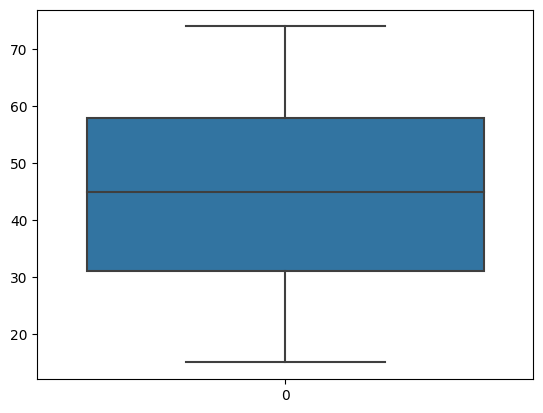

In [6]:
#3. Checking outliers
sns.boxplot(df.Age)

<Axes: >

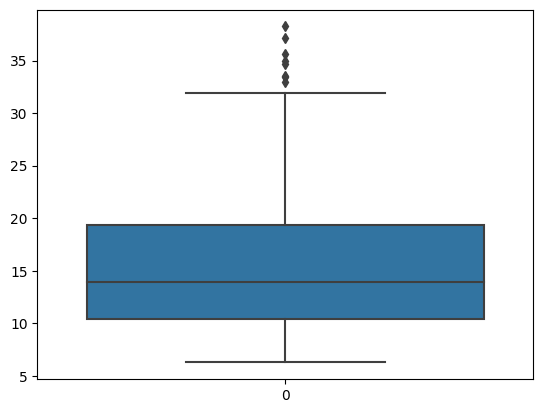

In [7]:
sns.boxplot(df.Na_to_K)

In [19]:
'''Thus no outliers in Age and we have outliers in Na_to_K values, Thus replacing 
them using Median Method'''
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
print(q1)
print(q3)
IQR = q3-q1
print(IQR)
ul = q3+1.5*IQR
ll = q1-1.5*IQR
print(df['Na_to_K'].median())

#Replacing Outliers
df['Na_to_K'] = np.where(df['Na_to_K']>ul,14,df['Na_to_K'])


10.4455
18.8545
8.409000000000002
13.9365


<Axes: >

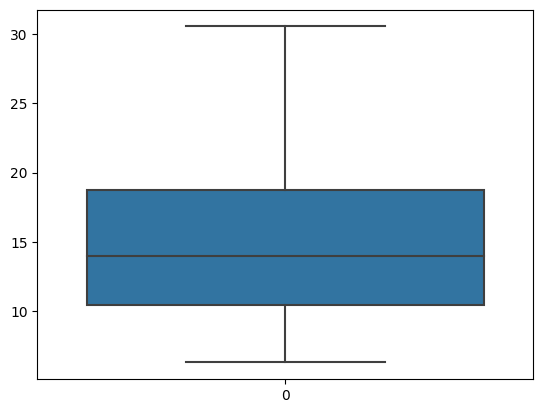

In [20]:
sns.boxplot(df.Na_to_K)

In [21]:
'''From step 2 we know that the type of Sex, BP, Cholesterol and Drug are object
hence needs to be encoded'''
#4. Getting unique values and their counts
print(df['Sex'].unique())
print(df['Sex'].value_counts())

print(df['BP'].unique())
print(df['BP'].value_counts())

print(df['Cholesterol'].unique())
print(df['Cholesterol'].value_counts())

print(df['Drug'].unique())
print(df['Drug'].value_counts())

['F' 'M']
M    104
F     96
Name: Sex, dtype: int64
['HIGH' 'LOW' 'NORMAL']
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
['HIGH' 'NORMAL']
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [73]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [74]:
#5. Splitting x and Y
x = df.iloc[:,0:5].values
x

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043],
       [22.   ,  0.   ,  2.   ,  0.   ,  8.607],
       [49.   ,  0.   ,  2.   ,  0.   , 16.275],
       [41.   ,  1.   ,  1.   ,  0.   , 11.037],
       [60.   ,  1.   ,  2.   ,  0.   , 15.171],
       [43.   ,  1.   ,  1.   ,  1.   , 19.368],
       [47.   ,  0.   ,  1.   ,  0.   , 11.767],
       [34.   ,  0.   ,  0.   ,  1.   , 19.199],
       [43.   ,  1.   ,  1.   ,  0.   , 15.376],
       [74.   ,  0.   ,  1.   ,  0.   , 20.942],
       [50.   ,  0.   ,  2.   ,  0.   , 12.703],
       [16.   ,  0.   ,  0.   ,  1.   , 15.516],
       [69.   ,  1.   ,  1.   ,  1.   , 11.455],
       [43.   ,  1.   ,  0.   ,  0.   , 13.972],
       [23.   ,  1.   ,  1.   ,  0.   ,  7.298],
       [32.   ,  0.   ,  0.   ,  1.   , 25.974],
       [57.   ,  1. 

In [61]:
y = pd.get_dummies(df.iloc[:, 5:]).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [62]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [63]:
#6. Splitting Training and Testing Data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.2,random_state=12)

In [64]:
#7. Checking Shape
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [65]:
ytrain.shape, ytest.shape

((160, 5), (40, 5))

In [87]:
#Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)
#Model Layers
model = Sequential()
model.add(Dense(18,input_dim=5,activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(45,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(52,activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [88]:
#Model Compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 18)                108       
                                                                 
 dense_43 (Dense)            (None, 36)                684       
                                                                 
 dense_44 (Dense)            (None, 45)                1665      
                                                                 
 dense_45 (Dense)            (None, 120)               5520      
                                                                 
 dense_46 (Dense)            (None, 52)                6292      
                                                                 
 dense_47 (Dense)            (None, 36)                1908      
                                                                 
 dense_48 (Dense)            (None, 5)                

In [90]:
#model training
model.fit(xtrain,ytrain,batch_size=10,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 2s 19ms/step - loss: 1.4189 - accuracy: 0.4688 - val_loss: 1.2798 - val_accuracy: 0.4000
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 1.1796 - accuracy: 0.4875 - val_loss: 1.0817 - val_accuracy: 0.5000
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.9753 - accuracy: 0.6250 - val_loss: 0.9066 - val_accuracy: 0.6500
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.7791 - accuracy: 0.7000 - val_loss: 0.7087 - val_accuracy: 0.7000
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6086 - accuracy: 0.7500 - val_loss: 0.5921 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.8313 - val_loss: 0.4954 - val_accuracy: 0.8250
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8313 - val_loss: 0.4040 - val_accuracy: 0.8500
Epoch 8/20
16/16 [=

In [91]:
#Task 3: Test the model with random data
ypred = model.predict(xtest)

2/2 [==============================] - 0s 8ms/step


In [92]:
#ypred = model.predict([[[[[23,2,2,1,25.355]]]]])

test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 9ms/step - loss: 0.2663 - accuracy: 0.9000
Test accuracy: 89.99999761581421


In [100]:
random_data = np.array([[56,0, 1, 0, 11.567]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 27ms/step
Predicted class: drugC


In [96]:
random_data = np.array([[23,1,2,1,25.355]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 24ms/step
Predicted class: DrugY


In [97]:
random_data = np.array([[47, 0, 1, 1, 1.3]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 22ms/step
Predicted class: drugX


In [101]:
random_data = np.array([[56,0, 1, 0, 11.567]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 35ms/step
Predicted class: drugC


In [105]:
random_data = np.array([[43,1, 0, 0, 15.567]])  # Example random data
random_data_scaled = scaler.transform(random_data)
prediction = model.predict(random_data_scaled)
predicted_class_index = np.argmax(prediction)
predicted_class = le.inverse_transform([predicted_class_index])

print('Predicted class:', predicted_class[0])

1/1 [==============================] - 0s 23ms/step
Predicted class: drugA
